<a href="https://colab.research.google.com/github/ednamilgo/EASY_ML/blob/main/4_(d)_Practicals_CNN_TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN for MNIST Digit Classification using TensorFlow/Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-04-09 11:00:57.367339: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Step 1: Load and Preprocess the MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
# # Path to the directory where your dataset is stored
# data_dir = "path/to/your_dataset"

# # Load the training and validation datasets
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=os.path.join(data_dir, "train"),
#     label_mode="int",  # Labels will be returned as integers
#     image_size=(128, 128),  # Resize all images to the same size
#     batch_size=32,  # Number of images to process at once
# )

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory=os.path.join(data_dir, "val"),
#     label_mode="int",  # Labels will be returned as integers
#     image_size=(128, 128),  # Resize all images to the same size
#     batch_size=32,  # Number of images to process at once
# )

## Step 2: Visualize a Sample Image

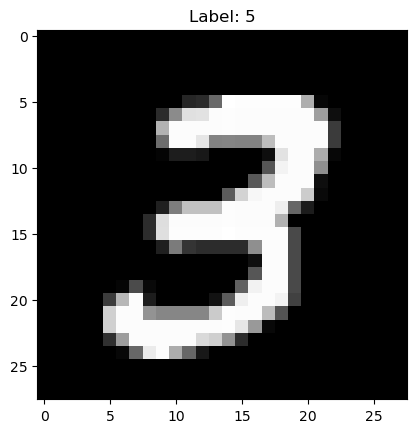

In [ ]:
plt.imshow(x_train[7].squeeze(), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

## Step 4: Define the CNN Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),# Conv Layer
    layers.MaxPooling2D((2, 2)),# Pooling Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),# Fully connected Layer
    layers.Dense(10)
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Step 6: Train the Model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 103ms/step - accuracy: 0.8796 - loss: 0.4020 - val_accuracy: 0.9805 - val_loss: 0.0701
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 62ms/step - accuracy: 0.9823 - loss: 0.0584 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 132s 121ms/step - accuracy: 0.9881 - loss: 0.0390 - val_accuracy: 0.9902 - val_loss: 0.0328
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 131s 108ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.9902 - val_loss: 0.0348
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 129s 92ms/step - accuracy: 0.9933 - loss: 0.0201 - val_accuracy: 0.9913 - val_loss: 0.0319


## Step 7: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2%}")

313/313 - 4s - 13ms/step - accuracy: 0.9900 - loss: 0.0283

Test accuracy: 99.00%


## Step 8: Predict a Sample Image

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


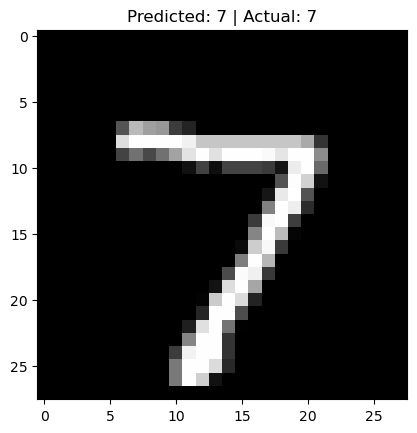

In [ ]:
import numpy as np

prob_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = prob_model.predict(x_test)

sample_index = 0
plt.imshow(x_test[sample_index].squeeze(), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[sample_index])} | Actual: {y_test[sample_index]}")
plt.show()

## Summary

| Layer            | Function                          |
|------------------|-----------------------------------|
| `Conv2D`         | Learns local image features       |
| `MaxPooling2D`   | Reduces spatial dimensions        |
| `Flatten`        | Converts 2D to 1D vector          |
| `Dense`          | Fully connected decision layer    |
| `Softmax`        | Converts logits to probabilities  |